# Making subplots

Now that we have looked at all the plots and determined they are OK, we need to combine all plots into a single figure.

This is where subplots come in.

In [1]:
import numpy as np, glob, scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as pl
%matplotlib inline

In [3]:
def line(x, slope, intercept):
    return slope * x + intercept

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


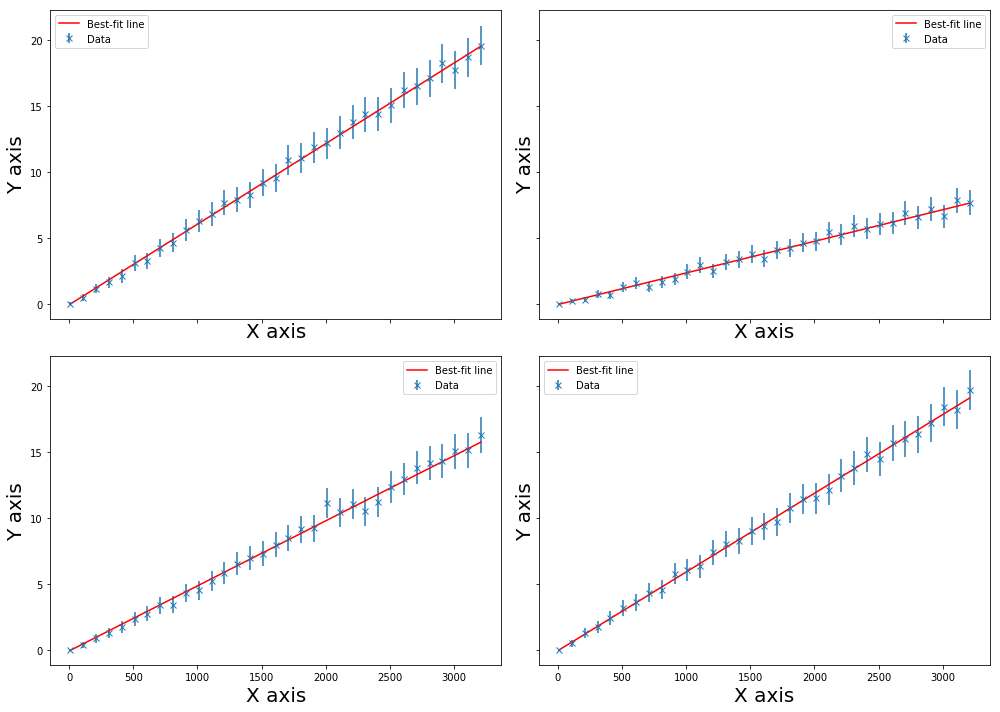

In [18]:
path_to_data = "./data_1/*"

data_files = glob.glob(path_to_data)

fig, axes = pl.subplots(nrows = 2, ncols = 2, figsize = (14, 10), sharex = True, sharey = True)

row = 0
col = 0

for ii, path in enumerate(data_files):
    
    data = np.load(path)
    x_axis = data['arr_0']
    y_axis = data['arr_1']
    y_err = data['arr_2']
    
    popt, pconv = curve_fit(line, x_axis, y_axis, sigma = y_err, absolute_sigma = True)
    
    errors = np.sqrt(np.diag(pconv))
    
    sim_x = x_axis
    sim_y = line(x_axis, popt[0], popt[1])
    
    axes[row][col].errorbar(x_axis, y_axis, yerr = y_err, fmt = 'x', label = 'Data')
    axes[row][col].plot(sim_x, sim_y, color = 'r', label = 'Best-fit line')
    
    axes[row][col].set_xlabel("X axis", fontsize = 20)
    axes[row][col].set_ylabel("Y axis", fontsize = 20)
    
    axes[row][col].legend(loc = 'best')
    
    col += 1
    if col % 2 == 0:
        row += 1
        col = 0

fig.tight_layout()
fig.show()

### _Problem_

Do the same as above but for `data_2`

### _Advanced Problem_

Combine `data_1` and `data_2` and edit the above program to display all 8 plots in one single plot